## Using user data to predict whether User is a Yelp Elite

Can we just use user data (as provided by yelp) to predict whether an User is a Yelp elite?


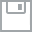
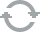
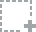
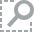
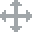
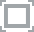
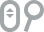
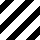
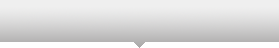
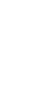
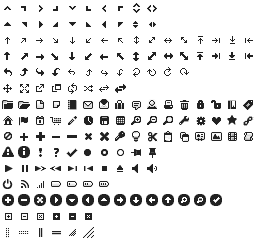
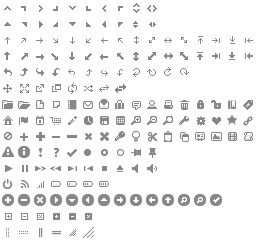
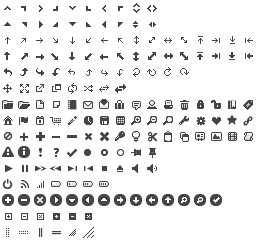
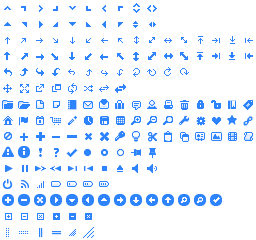
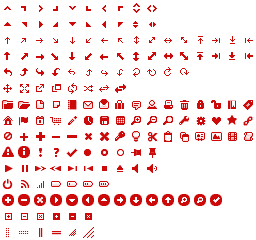
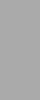
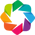
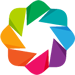

In [1]:
import json
import pandas as pd
import numpy as np
from bokeh.plotting import figure, output_notebook,show
output_notebook()
%matplotlib inline


from unbalanced_dataset import UnderSampler, OverSampler, SMOTE


from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.cross_validation import ShuffleSplit
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import train_test_split 

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.svm import SVC

In [2]:
import json

data = []
with open('/Users/chc/desktop/yelp2/yelp_academic_dataset_user.json') as f:
    for line in f:
        data.append(json.loads(line))

In [3]:
yelp_df= pd.DataFrame(data)
yelp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 366715 entries, 0 to 366714
Data columns (total 11 columns):
average_stars    366715 non-null float64
compliments      366715 non-null object
elite            366715 non-null object
fans             366715 non-null int64
friends          366715 non-null object
name             366715 non-null object
review_count     366715 non-null int64
type             366715 non-null object
user_id          366715 non-null object
votes            366715 non-null object
yelping_since    366715 non-null object
dtypes: float64(1), int64(2), object(8)
memory usage: 33.6+ MB


### Preprocessing

In [4]:
def collector(x):
    return x['cool']

yelp_df['cool']= yelp_df.votes.apply(collector)

In [5]:
def collector1(x):
    return x['useful']

yelp_df['useful']= yelp_df.votes.apply(collector1)

In [6]:
def collector2(x):
    return x['funny']

yelp_df['funny']= yelp_df.votes.apply(collector2)

In [7]:
def elite(x):
    if len(x)>0:
        return 1
    if len(x)<1:
        return 0
    
yelp_df['Elite'] = yelp_df.elite.apply(elite)

In [8]:
yelp_df['Friends'] = yelp_df.friends.apply(len)

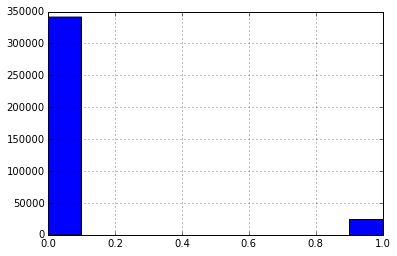

In [11]:
yelp_df['Elite'].hist()

In [9]:
def date(x):
    return 2015 - int(x[0:4])

yelp_df['years']= yelp_df.yelping_since.apply(date)
yelp_df.years.unique()

array([11,  7,  6,  5,  4,  3,  2,  1,  0,  8, 10,  9])

In [35]:
yelpu10 = yelp_df[yelp_df['review_count']<10]

In [37]:
yelpu10[yelpu10['average_stars']==5]

average_stars                                        compliments  \
25                  5                                                 {}   
52                  5                                                 {}   
60                  5                                                 {}   
63                  5                                      {u'plain': 1}   
74                  5                                                 {}   
78                  5                                                 {}   
84                  5                                                 {}   
87                  5                                                 {}   
110                 5                                                 {}   
112                 5                                                 {}   
120                 5                                                 {}   
122                 5                                                 {}   
126                 5  {u'note': 3, u'plain': 2, u'hot': 1, u'writer'...   
132                 5                                                 {}   
136                 5                                                 {}   
137                 5                                                 {}   
141                 5                                                 {}   
162                 5                                                 {}   
171                 5                                                 {}   
175                 5                                                 {}   
176                 5                                                 {}   
205                 5                                                 {}   
227                 5                                                 {}   
230                 5                                                 {}   
238                 5                                                 {}   
246                 5                                                 {}   
247                 5                                                 {}   
254                 5                                                 {}   
258                 5                                                 {}   
259                 5                                                 {}   
...               ...                                                ...   
366511              5                                      {u'plain': 1}   
366516              5                                                 {}   
366527              5                                                 {}   
366531              5                                                 {}   
366547              5                                                 {}   
366554              5                                                 {}   
366555              5                                                 {}   
366557              5                                                 {}   
366560              5                                                 {}   
366579              5                                                 {}   
366583              5                                                 {}   
366590              5                                                 {}   
366599              5                           {u'more': 1, u'cool': 1}   
366605              5                                                 {}   
366609              5                                                 {}   
366616              5                                                 {}   
366618              5                                                 {}   
366624              5                                                 {}   
366626              5                                                 {}   
366629              5                                                 {}   
366632              5                                   

In [33]:
def rounding(x):
    return round(x)

yelp_df['round_avg']= yelp_df['average_stars'].apply(rounding)

In [25]:
yelp_df = yelp_df.drop(['compliments','elite','friends','name','type','user_id','votes','yelping_since','round_avg'],axis=1)

In [12]:
yelp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 366715 entries, 0 to 366714
Data columns (total 9 columns):
average_stars    366715 non-null float64
fans             366715 non-null int64
review_count     366715 non-null int64
cool             366715 non-null int64
useful           366715 non-null int64
funny            366715 non-null int64
Elite            366715 non-null int64
Friends          366715 non-null int64
years            366715 non-null int64
dtypes: float64(1), int64(8)
memory usage: 28.0 MB


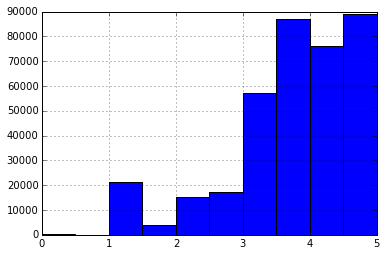

In [13]:
yelp_df['average_stars'].hist()

### Examining Data

In [15]:
yelpu10 = yelp_df[yelp_df['review_count']<10]

In [16]:
yelpu10[yelpu10['Elite']==1]

average_stars  fans  review_count  cool  useful  funny  Elite  \
3883             4.00    19             1     2       3      1      1   
58406            4.88     9             6     3      11      1      1   
60583            2.40    19             5     7      12     34      1   
64793            2.75     3             8    25      70    112      1   
103879           3.71     3             7     4       9      3      1   
209713           3.17     7             6    40      62     33      1   
215598           2.67   172             3     9      12     11      1   

        Friends  years  
3883         33     10  
58406        44      5  
60583        57      8  
64793        10      6  
103879        2      8  
209713      139      4  
215598      225      9

In [254]:
num_elite = []
num_entry = []

for x in range(10,80,10):
    yelppp = yelp_df[(yelp_df['review_count']>x-10) & (yelp_df['review_count']<x)]
    yelpppe = yelppp[yelppp['Elite']==1]
    num_elite.append(len(yelpppe.index))
    num_entry.append(len(yelppp.index))

In [255]:
num_elite

[7, 14, 88, 315, 510, 715, 827]

In [256]:
num_entry

[217902, 43828, 20593, 12250, 8074, 5900, 4437]

In [257]:
review_elite = pd.DataFrame(['0-10','10-20','20-30','30-40','40-50','50-60','60-70'], columns = ['review_count'])

In [258]:
review_elite['Number of Elites']=num_elite

In [259]:
review_elite['Total number'] = num_entry

In [260]:
review_elite['percentage of elites']= (review_elite['Number of Elites']/review_elite['Total number'])*100

In [261]:
review_elite

review_count  Number of Elites  Total number  percentage of elites
0         0-10                 7        217902              0.003212
1        10-20                14         43828              0.031943
2        20-30                88         20593              0.427330
3        30-40               315         12250              2.571429
4        40-50               510          8074              6.316572
5        50-60               715          5900             12.118644
6        60-70               827          4437             18.638720

In [262]:
e = yelp_df[yelp_df['Elite']==1]

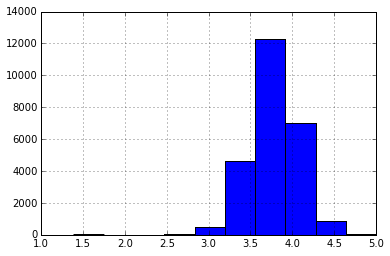

In [264]:
e['average_stars'].hist()

In [217]:
high_rating = yelp_df[yelp_df['average_stars']>3]

In [218]:
high_rating100 = high_rating[(high_rating['review_count']>100) & (high_rating['review_count']< 200)]

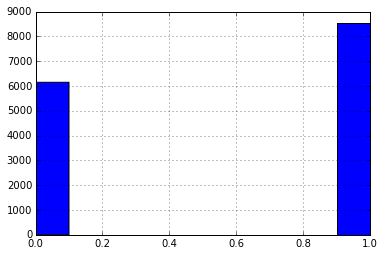

In [219]:
high_rating100['Elite'].hist()

In [220]:
low_rating = yelp_df[yelp_df['average_stars']<3]

In [221]:
low_rating100 = low_rating[(low_rating['review_count']>100) & (low_rating['review_count']< 200)]

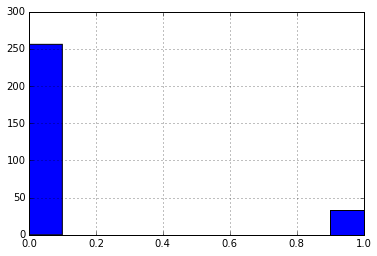

In [222]:
low_rating100['Elite'].hist()

In [223]:
yelpu30 = yelp_df[yelp_df['review_count']<10]

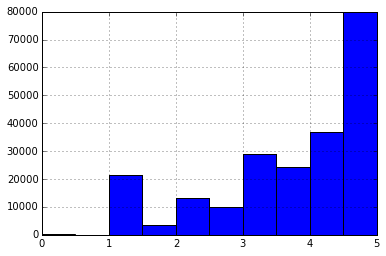

In [224]:
yelpu30['average_stars'].hist()

In [225]:
yelp_df[yelp_df['average_stars']<2].sort(['review_count'],ascending= False).head(50)

/Users/chc/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


average_stars  fans  review_count  cool  useful  funny  Elite  \
189364           1.96     1           188    35     309    112      0   
207450           1.92     2           148    29      93     45      0   
288559           1.57     2           121     3      44     17      0   
7240             1.51     1            94    10     212     49      0   
295023           1.76     1            91     8      53     35      0   
140620           1.59     5            80    21     107     82      0   
330735           1.98     1            77    18     110     37      0   
291693           1.96     0            72     7      83     41      0   
352477           1.96     2            71    34     258    127      0   
96728            1.39     9            69    86     162    318      1   
19296            1.56     0            63    11      76     80      0   
316179           1.57     0            62     4      71     84      0   
229622           1.64     1            61    10     117     24      0   
95485            1.92     0            59     2      90     22      0   
141362           1.45     1            57    21     218     57      0   
1628             1.57     2            55    14     100     47      0   
118511           1.92     1            53    12      39     22      0   
23255            1.82     0            51     4      24      6      0   
151252           1.88     1            49     8      54     15      0   
300246           1.24     0            49     6      62     21      0   
194548           1.92     0            48    10     143     42      0   
124147           1.89     0            47     5      85     33      0   
335571           1.37     2            47     3      59     31      0   
274084           1.96     0            46     1      38      3      0   
88943            1.49     0            46     7      25     17      0   
35339            1.83     0            44     8      45     11      0   
302676           1.21     1            44     8     115     58      0   
820              1.67     0            43    16      93     42      0   
36304            1.50     1            43    11      60     29      0   
227766           1.73     1            43     8      88     24      0   
163684           1.93     2            42    83     223    128      0   
216854           1.66     1            42     5      32      7      0   
24448            1.72     1            41     6      26     16      0   
52577            1.63     0            40     3      35     40      0   
52312            1.62     0            40     4      51     43      0   
282372           1.88     1            39     7      25     11      0   
117987           1.92     1            38    19     107     55      0   
83408            1.63     1            38    27     212     49      0   
274059           1.88     0            38    12      72     17      0   
29359            1.41     1            38     4     119     34      0   
126320           1.77     0            37     4      25     12      0   
7711             1.84     0            36     6      28     16      0   
258647           1.61     1            35     2      57     14      0   
187              1.95     0            35    15     178    104      0   
325              1.76     0            35     5      36     16      0   
33579            1.91     4            33    85     144    198      0   
14791            1.68     0            33     9      29     51      0   
150160           1.97     0            33    11      66     19      0   
208781           1.36     0            33     3      26      8      0   
329933           1.82     0            33    10      65     12      0   

        Friends  years  
189364        3      3  
207450        4      7  
288559       34      5  
7240          0      7  
295023        0      5  
140620       18      5  
330735        0      6  
291693        5      4  
352477        0      7  
96728        28      6  
19296    

## PCA testing for >50 reviews

In [226]:
yelpp = yelp_df[yelp_df['review_count']>50]
yelpp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49316 entries, 0 to 366674
Data columns (total 9 columns):
average_stars    49316 non-null float64
fans             49316 non-null int64
review_count     49316 non-null int64
cool             49316 non-null int64
useful           49316 non-null int64
funny            49316 non-null int64
Elite            49316 non-null int64
Friends          49316 non-null int64
years            49316 non-null int64
dtypes: float64(1), int64(8)
memory usage: 3.8 MB


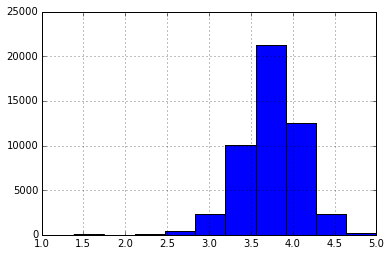

In [227]:
yelpp['average_stars'].hist()

In [228]:
yelpp = yelpp.drop('years',axis=1)

In [229]:
data_10 = yelpp.drop('Elite',axis = 1)
labels_10 = yelpp.Elite


In [230]:
scaler = StandardScaler()
features_norm = scaler.fit_transform(data_10)

data_10_2 = pd.DataFrame(features_norm, columns=data_10.columns)
data_10_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49316 entries, 0 to 49315
Data columns (total 7 columns):
average_stars    49316 non-null float64
fans             49316 non-null float64
review_count     49316 non-null float64
cool             49316 non-null float64
useful           49316 non-null float64
funny            49316 non-null float64
Friends          49316 non-null float64
dtypes: float64(7)
memory usage: 3.0 MB


In [231]:
x = data_10_2
y = labels_10

In [232]:
pca = PCA(n_components=2)
X_test_r = pca.fit(x).transform(x)

In [233]:
color_mapping = {0:'red',1:'blue'}

colors = []

for value in y:
    new_color = color_mapping[value]
    colors.append(new_color)

In [234]:
##XX=    X_test_r[y_test]

In [235]:
##XX1 = X_test_r[~y_test]

In [236]:
p = figure(title="PCA")

x_values =  X_test_r[:,0]
y_values =  X_test_r[:,1]
p.circle(x = x_values,y=y_values,size = 1,color=colors, alpha =0.5)

show(p)

In [237]:
pca = PCA()
X_r = pca.fit(x).transform(x)

In [238]:
ratios = pca.explained_variance_ratio_
print ratios

[ 0.65730071  0.14394625  0.08286739  0.07548877  0.0339962   0.00547269
  0.00092799]


In [239]:
comp_id = [1, 2, 3, 4]             # id number of component
p = figure(title="Scree Plot",tools='',
           x_axis_label="Principal Component",
          y_axis_label='Eigenvalue')
p.line(comp_id,ratios,color='red')
show(p)

ERROR:/Users/chc/anaconda/lib/python2.7/site-packages/bokeh/validation/check.pyc:E-1000 (COLUMN_LENGTHS): ColumnDataSource column lengths are not all the same: ColumnDataSource, ViewModel:ColumnDataSource, ref _id: d0c160b6-46e8-4aad-96d1-a1a126ddad2e


### Modelling on PCA dataset

In [240]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [166]:
model = SVC(C=1,kernel='linear').fit(X_train,y_train)
y_pred = model.predict(X_test)
print classification_report(y_test,y_pred)

             precision    recall  f1-score   support

          0       0.72      0.88      0.80      5048
          1       0.84      0.64      0.73      4816

avg / total       0.78      0.77      0.76      9864



In [169]:
coef_dict = {k:v for k, v in zip(x.columns, model.coef_[0])}

p=Bar(coef_dict.values(), cat = coef_dict.keys(), title="SVC Feature Importance",xlabel='Features', ylabel='Linear Coefficient', width=600, height=600)
show(p)

In [157]:
X_r_train, X_r_test, y_r_train, y_r_test = train_test_split(X_test_r,y, test_size=0.2, random_state=0)

In [158]:
count = 0
for i in y_r_test:
    if i == 1:
        count+=1
count

4816

In [159]:
1-(4816.00000/9864)

0.5117599351175994

In [160]:
len(y_r_test)

9864

In [161]:
model = SVC(C=1,kernel='rbf').fit(X_r_train,y_r_train)
y_pred = model.predict(X_r_test)
print classification_report(y_r_test,y_pred)

             precision    recall  f1-score   support

          0       0.78      0.81      0.80      5048
          1       0.79      0.76      0.78      4816

avg / total       0.79      0.79      0.79      9864



###from sklearn import grid_search

parameters = {'kernel':('linear', 'rbf'), 'C':[0.1, 1, 10, 100]}
svr = SVC(kernel='linear')
model = grid_search.GridSearchCV(svr, parameters, n_jobs=4)


model.fit(X_r_train, y_r_train)

### Testing using other models

In [84]:
gnb = GaussianNB()
gnb.fit(X_r_train,y_r_train)

GaussianNB()

In [85]:
preds = gnb.predict(X_r_test)
preds

array([0, 0, 0, ..., 0, 0, 0])

In [80]:
from sklearn.cross_validation import cross_val_score

np.mean(cross_val_score(KNeighborsClassifier(31), x, y, cv=5))


0.79994277560291249

In [81]:
scores = []
for i in xrange(11,100,2):
    scores.append(np.mean(cross_val_score(KNeighborsClassifier(i), x, y, cv=5)))
    
    
max(scores)

0.80103764349615036

In [55]:
count1 = 0
for i in y:
    if i == 1:
        count1+=1
count1

24219

In [56]:
len(y)

49316

In [58]:
1.000000000 - 24219.000000/49316

0.508901776299781

### Learning curve

In [71]:
from sklearn.learning_curve import learning_curve
from sklearn.cross_validation import StratifiedKFold


train_sizes, train_scores, test_scores = learning_curve(SVC(C=1,kernel='rbf'),
                                                        X_test_r,
                                                        y,
                                                        train_sizes=np.linspace(0.05, 1.0, 10),
                                                        cv = StratifiedKFold(y, n_folds=5, shuffle=True, random_state=0))

In [74]:
p = figure(title='Learning Curve',y_range=(0.75,0.81))

p.line(x=train_sizes,y=train_scores.mean(axis=1),color='red',legend="Training Scores")

p.line(x=train_sizes,y=test_scores.mean(axis=1),color='blue',legend = "Test Scores")

p.legend.orientation = "top_right"

show(p)